**Mission 🚀 :** Analyze and compare trends in reviews for Adderall IR and XR. Provide actionable insights to pharmaceuticals and R&D teams to optimize ADHD drug development, ensuring individuals with the condition receive the most effective treatment possible!

**Hypotheses :**
(1) Sentiment analysis
H1: Reviews for Adderall XR are significantly more positive compared to Adderall IR.
H0: There is no significant difference in sentiment scores between reviews for Adderall XR and Adderall IR.
Ratings Distribution:
(2) Ratings Distribution
H1: Adderall XR has higher average ratings than Adderall IR due to its extended-release formulation.
H0: The average ratings for Adderall XR and Adderall IR are equal.
Useful Count and Rating Correlation:
(3) Useful Count vs. Ratings
H1: Reviews with higher useful counts are associated with higher ratings for both Adderall IR and XR.
H0: There is no significant correlation between useful counts and ratings for Adderall IR and XR.

**Notes :** We will be referring to Adderall IR as "Adderall" in our code.

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Correct file path for the MyDrive folder
file_path = '/content/gdrive/MyDrive/drugsComTest_raw.csv'

df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
# Get shape on df (number of rows, number of columns)
print("Data shape:", df.shape)

Data shape: (53766, 7)


---- DATA EXPLORATION ----

In [ ]:
import numpy as np

# Isolate numeric values so we know what variables to use for future calculations
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes

,0
uniqueID,int64
rating,int64
usefulCount,int64


In [ ]:
# Fix name error: Use bool indexing to include rows where 'DrugName' column is 'Adderall'
# For reference, Adderall in the CSV file represents Adderall
df_adderall=df[df['drugName']=='Adderall']
df_adderall.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
773,88387,Adderall,ADHD,"""I was diagnosed with ADD at 21, as a junior i...",9,14-Dec-11,9
913,88462,Adderall,ADHD,"""I&#039;ve been taking Adderall for 3 years an...",5,20-Sep-10,20
2002,88447,Adderall,ADHD,"""I have used this medication for over three ye...",9,20-Apr-12,14
2749,88423,Adderall,ADHD,"""I&#039;ve had a wonderful experience with Add...",10,2-Jun-13,38
2909,88348,Adderall,ADHD,"""I have been using Adderall for about 2 years ...",10,6-Feb-15,62


In [ ]:
# Do the same thing for Adderall XR
df_adderall_XR=df[df['drugName']=='Adderall XR']
df_adderall_XR.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
1021,180680,Adderall XR,Narcolepsy,"""I was diagnosed with severe sleep apnea and n...",9,26-Apr-13,28
4205,180709,Adderall XR,ADHD,"""I am 22 years old. I have been on just about ...",10,3-Jul-08,40
4844,180644,Adderall XR,ADHD,"""I have always known I was intelligent and a d...",10,14-Oct-11,40
6277,180631,Adderall XR,ADHD,"""The extended release tablets enable me to mai...",10,22-Jan-15,36
6411,180674,Adderall XR,ADHD,"""Couldn&#039;t live without it. Didn&#039;t di...",10,25-Aug-13,30


In [ ]:
# Now, let's get a descriptive statistical summary of numeric columns in dfs

# Describe data for Adderall and round 2 decimal values
df_adderall.describe()
round(df_adderall.describe(),2)

,uniqueID,rating,usefulCount
count,72.00,72.00,72.00
mean,88409.22,8.00,43.50
std,91.97,2.30,33.16
min,88253.00,1.00,0.00
25%,88326.75,7.75,19.75
50%,88422.50,9.00,37.00
75%,88475.75,9.00,59.00
max,88581.00,10.00,182.00


In [ ]:
# Describe data for Adderall XR and round 2 decimal values
df_adderall_XR.describe()
round(df_adderall_XR.describe(),2)

,uniqueID,rating,usefulCount
count,35.00,35.00,35.00
mean,180659.20,8.77,27.77
std,45.58,1.46,17.50
min,180566.00,3.00,4.00
25%,180635.50,8.00,12.50
50%,180659.00,9.00,27.00
75%,180692.50,10.00,40.00
max,180739.00,10.00,68.00


In [ ]:
import pandas as pd
import numpy as np

# Data for both adderall and Adderall Xr
df_adderall = df[df['drugName'] == 'Adderall']
df_adderall_XR = df[df['drugName'] == 'Adderall XR']

# MRSE FUNCTION
def calculate_mrse(data, baseline):
    #Calculate Mean Root Square Error
    errors = (data['rating'] - baseline) ** 2
    return np.sqrt(errors.mean())

# Finding the mean of both Adderall and Adderall XR
adderall_mean = df_adderall['rating'].mean()
adderall_xr_mean = df_adderall_XR['rating'].mean()

# MRSE for Adderall and Adderall XR
mrse_adderall = calculate_mrse(df_adderall, adderall_mean)
mrse_adderall_xr = calculate_mrse(df_adderall_XR, adderall_xr_mean)

# Data frame to compare Adderall and Adderall XR
mrse_comparison = pd.DataFrame({
    'Drug': ['Adderall', 'Adderall XR'],
    'MRSE': [mrse_adderall, mrse_adderall_xr]
})

print("MRSE Comparison for Adderall vs Adderall XR:")
print(mrse_comparison)

MRSE Comparison for Adderall vs Adderall XR:
          Drug      MRSE
0     Adderall  2.279132
1  Adderall XR  1.435981


In [ ]:
import pandas as pd

def adderall_correlation():
    # Read CSV file
    adderall_data = pd.read_csv('drugsComTest_raw.csv')

    # Check for col names in df
    print(adderall_data.columns)

    # Correlation matrix between 'rating' and 'usefulCount'
    numerical_data = adderall_data[['rating','usefulCount']]
    correlation_matrix = numerical_data.corr()

    print("Correlation matrix:")
    print(correlation_matrix)

adderall_correlation()

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')
Correlation matrix:
               rating  usefulCount
rating       1.000000     0.236897
usefulCount  0.236897     1.000000


In [ ]:
import pandas as pd

# Use bool indexing to filter the original DataFrame for 'Adderall' and 'Adderall XR'
df_adderall = df[df['drugName'] == 'Adderall']
df_adderall_XR = df[df['drugName'] == 'Adderall XR']

# How many reviews and average rating per drug
# Adderall (i = 0)and Adderall XR (i = 1)
adderall_stats = {
    'Drug': 'Adderall',
    'Average Rating': df_adderall['rating'].mean(),
    'Review Count': len(df_adderall)
}

adderall_xr_stats = {
    'Drug': 'Adderall XR',
    'Average Rating': df_adderall_XR['rating'].mean(),
    'Review Count': len(df_adderall_XR)
}

# Making a df for comparison for both drugs
comparison_df = pd.DataFrame([adderall_stats, adderall_xr_stats])
comparison_df.head()

,Drug,Average Rating,Review Count
0,Adderall,8.000000,72
1,Adderall XR,8.771429,35


--- DATA MODELLING AND VISUALIZATION ----

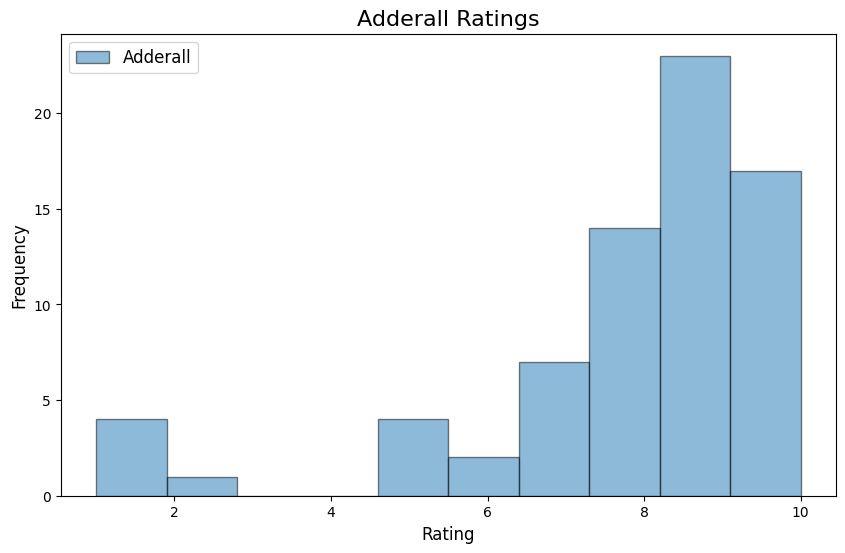

In [ ]:
# Adderall Data
import matplotlib.pyplot as plt
df_adderall = df[df['drugName'] == 'Adderall']


# Creating histograms for adderall ratings
plt.figure(figsize=(10, 6))

# Histogram for Adderall
plt.hist(df_adderall['rating'], bins=10, alpha=0.5, label='Adderall', edgecolor='black')
plt.title('Adderall Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.show()

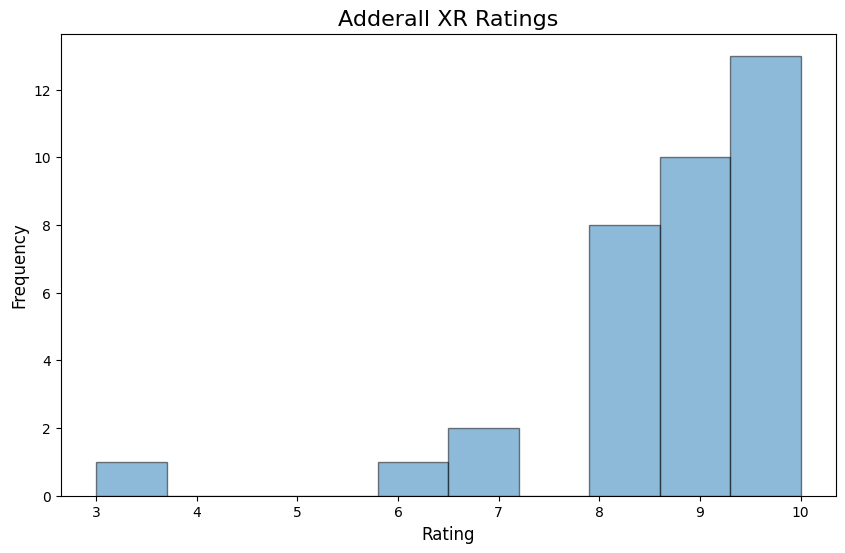

In [ ]:
# Adderall XR data
import matplotlib.pyplot as plt
df_adderall_XR = df[df['drugName'] == 'Adderall XR']

# Creating histograms for adderall XR ratings
plt.figure(figsize=(10, 6))

# histogram for adderall XR
plt.hist(df_adderall_XR['rating'], bins=10, alpha=0.5, label='Adderall XR', edgecolor='black')
plt.title('Adderall XR Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Difference between corr matrix vs linear regression?
Corr: measures simple association between values, symmetric variables, exploratory data analysis
Linear: predictive modelling and hypothesis testing, asymmetric variables, deeper insights (prediction, impact size, residuals)

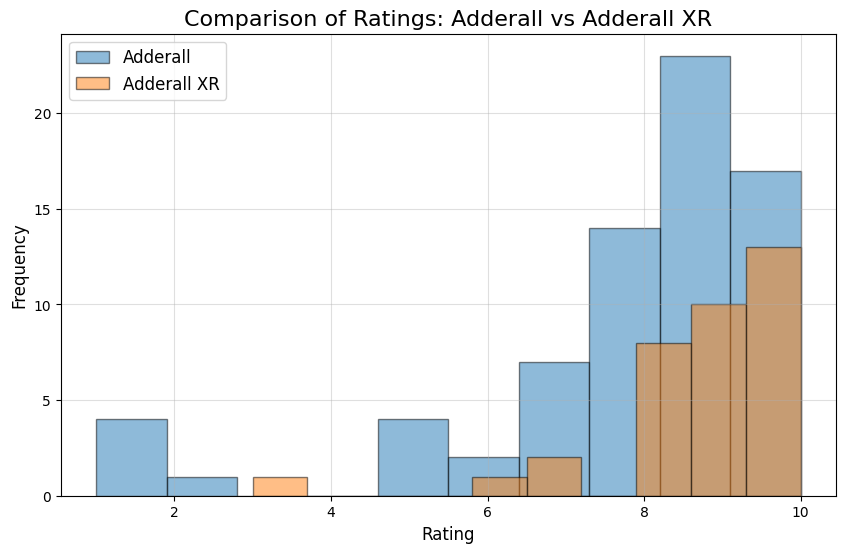

In [ ]:
import matplotlib.pyplot as plt
# Comparison of ratings histogram on one plot
df_adderall = df[df['drugName'] == 'Adderall']
df_adderall_XR = df[df['drugName'] == 'Adderall XR']

plt.figure(figsize=(10, 6))

# Create histogram for Adderall and XR
plt.hist(df_adderall['rating'], bins=10, alpha=0.5, label='Adderall', edgecolor='black')
plt.hist(df_adderall_XR['rating'], bins=10, alpha=0.5, label='Adderall XR', edgecolor='black')

plt.title('Comparison of Ratings: Adderall vs Adderall XR', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()

---- TESTING AND TRAINING USING COMBINED DF ----

Regression Coefficients: [0.01563407]
Intercept: 7.513809970151546
Mean Squared Error (MSE): 2.643518999044202
R-squared (R2): -0.248392103191299


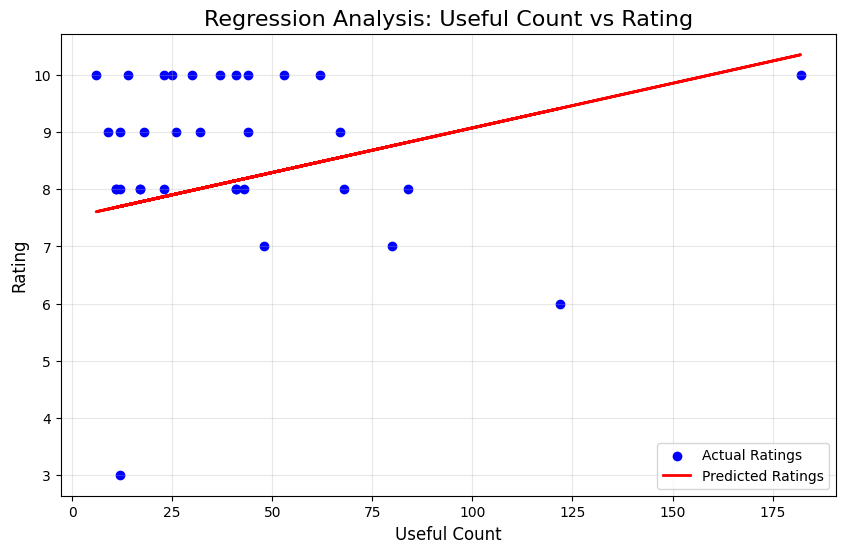

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_adderall = df[df['drugName'] == 'Adderall']
df_adderall_XR = df[df['drugName'] == 'Adderall XR']

# Combine Adderall and XR data for train/test using concat
# Citation concat for 2 objs: https://pandas.pydata.org/docs/reference/api/pandas.concat.html
df_combined = pd.concat([df_adderall, df_adderall_XR])

# Using 'usefulCount' to predict 'rating'
X = df_combined[['usefulCount']]
y = df_combined['rating']

# Splitting data into training and test sets; 70% train 30% test split
# random_state allows this split to be applied every trial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train regression models for future accuracy of prediction model
# Effort to reduce MSE
model = LinearRegression()
model.fit(X_train, y_train)

# Now test on unseen data without biases
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Ratings')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Ratings')
plt.title('Regression Analysis: Useful Count vs Rating', fontsize=16)
plt.xlabel('Useful Count', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Now we know not to include useful count in our final analysis and recommendations for the R&D of ADHD drugs. Perhaps, try sentiment analysis instead?

<ipython-input-24-1ea393bf9b7a>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_data['cleaned_reviews'] = drug_data['review'].apply(clean_text_manual)
<ipython-input-24-1ea393bf9b7a>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_data['sentiment'] = drug_data['cleaned_reviews'].apply(lambda words: sentiment_score(words, sentiment_dict))
<ipython-input-24-1ea393bf9b7a>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

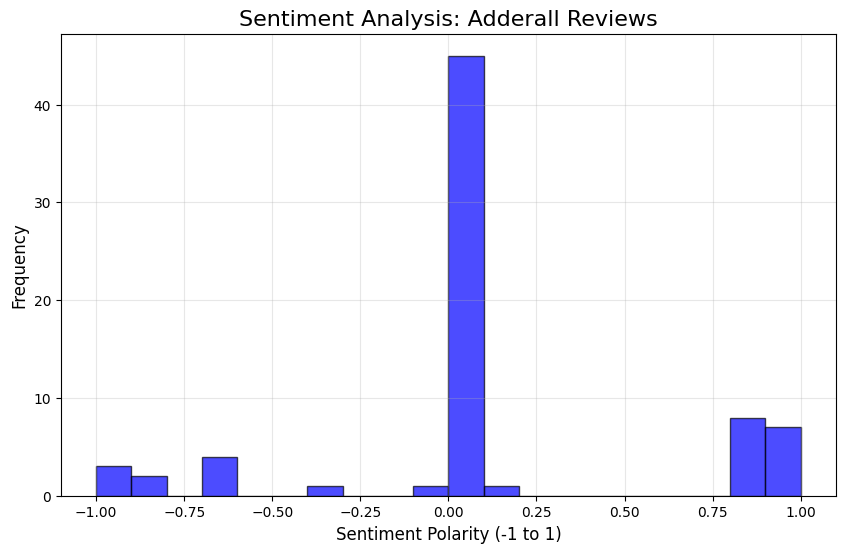

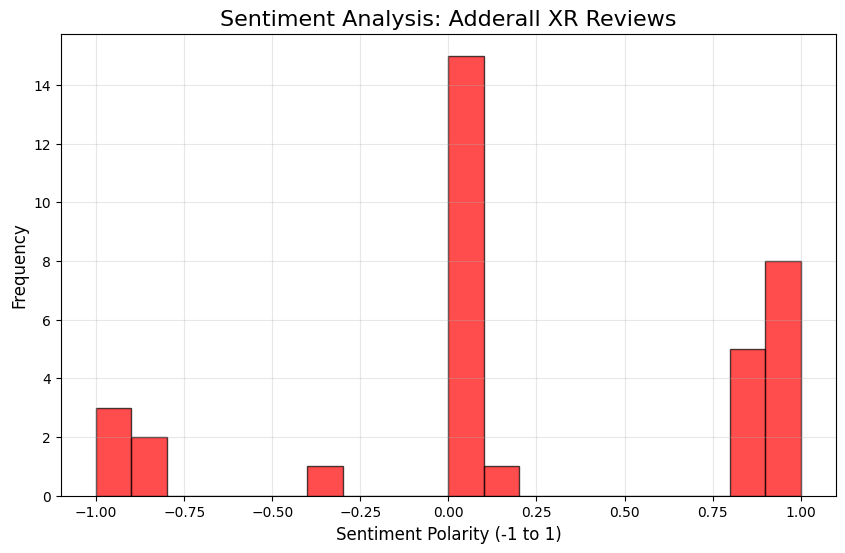

In [ ]:
# Sentiment analysis method 1: dictionary

import pandas as pd
import matplotlib.pyplot as plt

# Sentiment word dictionary
sentiment_dict = {
    "good": 1.0,
    "amazing": 1.0,
    "fantastic": 1.0,
    "excellent": 0.9,
    "great": 0.8,
    "happy": 0.8,
    "positive": 0.7,
    "bad": -1.0,
    "terrible": -0.9,
    "unhappy": -0.8,
    "negative": -0.7,
    "neutral": 0.0,
    "dissapointed": 0.0
}

# Manual function to clean text without using `str`
def clean_text_manual(text):
    if pd.isnull(text):
        return []

    # Replace punctuation with space
    punctuation = ['.', ',', '!', '?', ';', ':', '-', '_', '"', "'"]
    clean_text = ""
    for character in text:
        if character in punctuation:
            clean_text += " "
        else:
            clean_text += character

    # Split into lowercase words manually
    clean_words = []
    for word in clean_text.split():  # Use split here for simplicity
        lower_word = ""
        for character in word:
            if 'A' <= character <= 'Z':  # Convert uppercase letters to lowercase manually
                lower_word += chr(ord(character) + 32)
            else:
                lower_word += character
        clean_words.append(lower_word)

    return clean_words

# Function to calculate sentiment score
def sentiment_score(words, sentiment_dict):
    score = 0
    count = 0
    for word in words:
        if word in sentiment_dict:
            score += sentiment_dict[word]
            count += 1
    return score / count if count > 0 else 0  # Avoid division by zero

# Load data and process reviews
def analyze_sentiment(data, drug_name):
    drug_data = data[data['drugName'] == drug_name]
    drug_data['cleaned_reviews'] = drug_data['review'].apply(clean_text_manual)
    drug_data['sentiment'] = drug_data['cleaned_reviews'].apply(lambda words: sentiment_score(words, sentiment_dict))
    return drug_data

# Example: Adderall and Adderall XR sentiment
adderall_data = analyze_sentiment(df, "Adderall")
adderall_xr_data = analyze_sentiment(df, "Adderall XR")

# Plot sentiment histogram
def plot_sentiment_histogram(data, title, color):
    plt.figure(figsize=(10, 6))
    plt.hist(data['sentiment'], bins=20, alpha=0.7, color=color, edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel('Sentiment Polarity (-1 to 1)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

plot_sentiment_histogram(adderall_data, "Sentiment Analysis: Adderall Reviews", "blue")
plot_sentiment_histogram(adderall_xr_data, "Sentiment Analysis: Adderall XR Reviews", "red")

From this rough sentiment analysis, we can see that Adderall XR seems to have higher sentiment with lower frequency. However, performing sentiment analysis without an API is inaccurate. Let's try an alternative method using TextBlob for more accurate sentiment analysis.

<ipython-input-58-819b3818ddb1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adderall_data['sentiment'] = adderall_data['review'].apply(calculate_sentiment)
<ipython-input-58-819b3818ddb1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adderall_xr_data['sentiment'] = adderall_xr_data['review'].apply(calculate_sentiment)


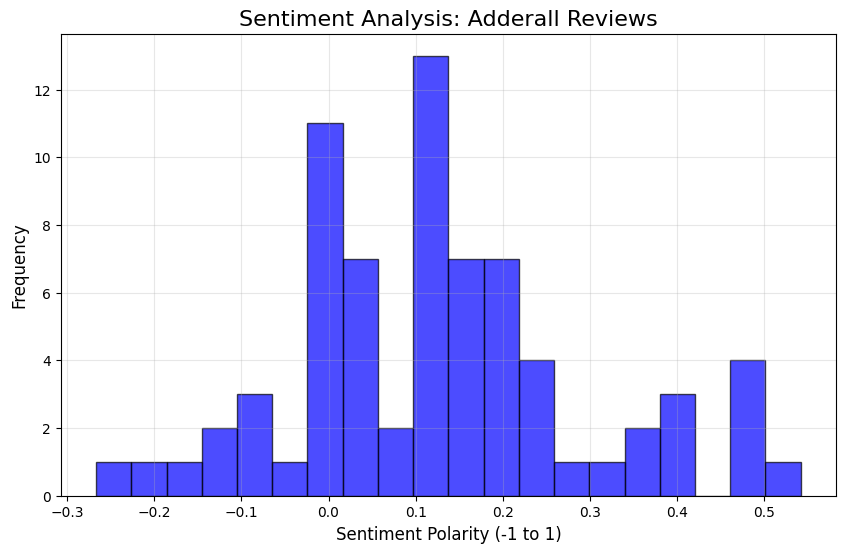

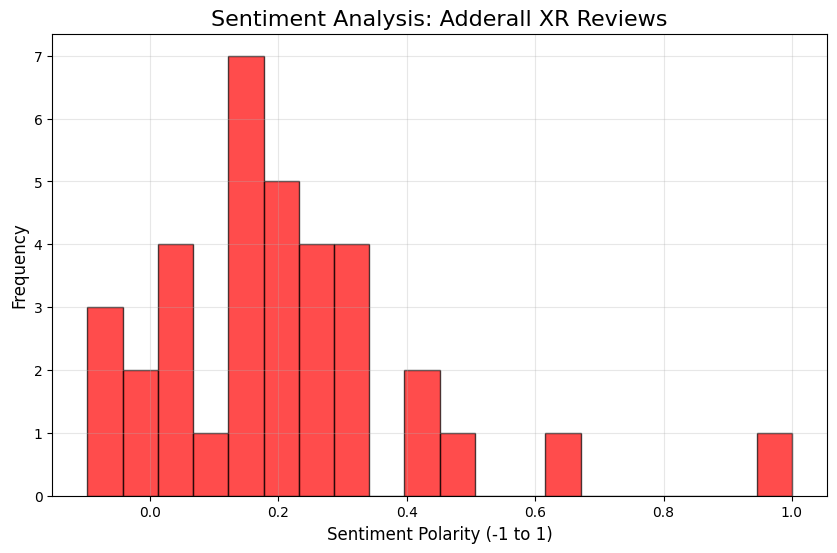

<ipython-input-58-819b3818ddb1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adderall_data['sentiment'] = adderall_data['review'].apply(calculate_sentiment)
<ipython-input-58-819b3818ddb1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adderall_xr_data['sentiment'] = adderall_xr_data['review'].apply(calculate_sentiment)


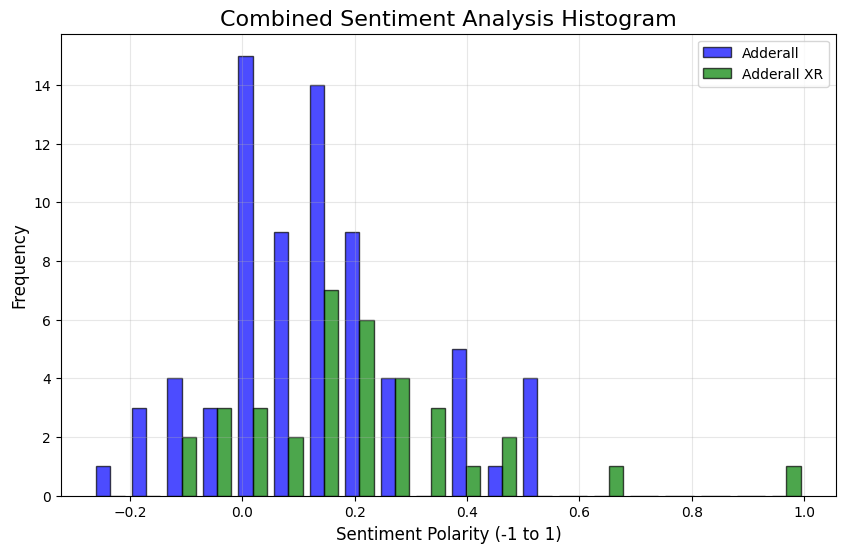

In [ ]:
# Sentiment analysis method 2: TextBlob API

import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

def plot_chart():
    adderall_data = df[df['drugName'] == 'Adderall']
    adderall_xr_data = df[df['drugName'] == 'Adderall XR']

    def plot_sentiment_histogram(data, title, color):
        plt.figure(figsize=(10, 6))
        plt.hist(data['sentiment'], bins=20, alpha=0.7, color=color, edgecolor='black')
        plt.title(title, fontsize=16)
        plt.xlabel('Sentiment Polarity (-1 to 1)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(alpha=0.3)
        plt.show()

    adderall_data['sentiment'] = adderall_data['review'].apply(calculate_sentiment)
    adderall_xr_data['sentiment'] = adderall_xr_data['review'].apply(calculate_sentiment)

    plot_sentiment_histogram(adderall_data, 'Sentiment Analysis: Adderall Reviews', 'blue')
    plot_sentiment_histogram(adderall_xr_data, 'Sentiment Analysis: Adderall XR Reviews', 'red')

def histogram():
    adderall_data = df[df['drugName'] == 'Adderall']
    adderall_xr_data = df[df['drugName'] == 'Adderall XR']

    adderall_data['sentiment'] = adderall_data['review'].apply(calculate_sentiment)
    adderall_xr_data['sentiment'] = adderall_xr_data['review'].apply(calculate_sentiment)

    plt.figure(figsize=(10, 6))
    plt.hist([adderall_data['sentiment'], adderall_xr_data['sentiment']],
             bins=20, color=['blue', 'green'], label=['Adderall', 'Adderall XR'], alpha=0.7, edgecolor='black')
    plt.title('Combined Sentiment Analysis Histogram', fontsize=16)
    plt.xlabel('Sentiment Polarity (-1 to 1)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

def calculate_sentiment(review):
    if pd.isnull(review):
        return 0
    return TextBlob(review).sentiment.polarity

def main():
    plot_chart()
    histogram()

main()

Concluded that results from method 1 should be excluded from final analysis, as it does not effectively capture user sentiment of Adderrall IR and XR.

---- CONCLUSIONS ----

**Revisiting Hypotheses 💡 :**
(1) Sentiment Analysis
H1: Reviews for Adderall XR are significantly more positive compared to Adderall IR.
(2) H1: Adderall XR has higher average ratings than Adderall IR due to its extended-release formulation.
(3) H0: There is no significant correlation between useful counts and ratings for Adderall IR and XR.